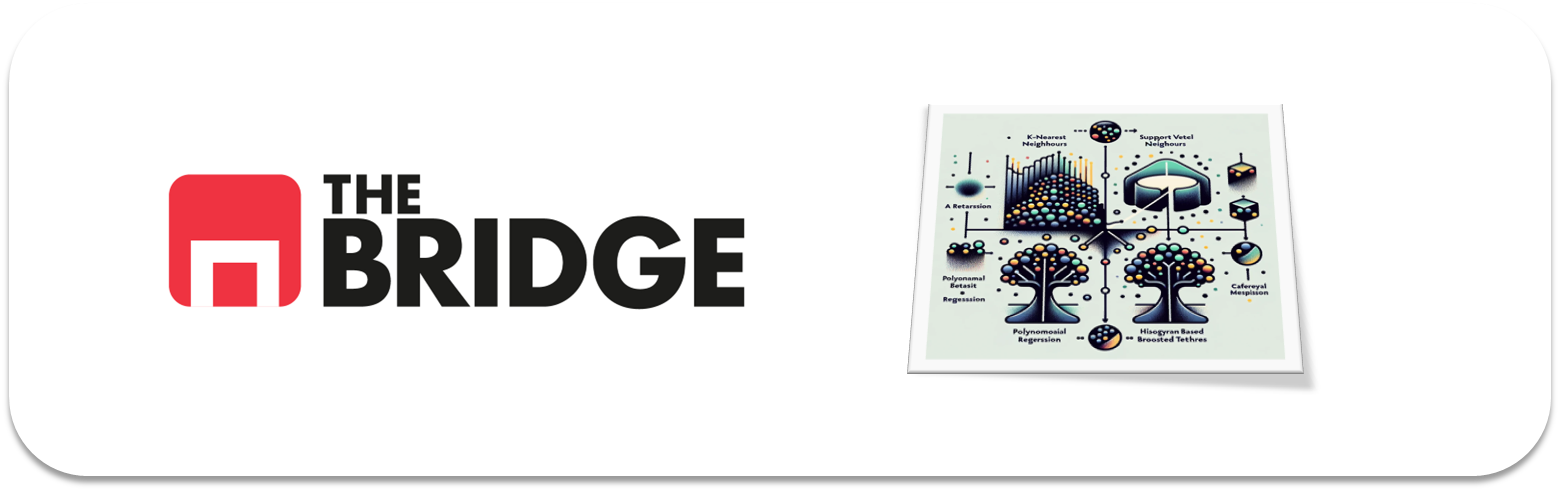

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, r2_score


In [2]:
# Ruta del archivo CSV
dataset_path = r"C:\Users\hp\Desktop\Python Scripts\wines_dataset.csv"

# Cargar el dataset con el delimitador correcto (basado en la vista previa)
data = pd.read_csv(dataset_path, delimiter="|", encoding="utf-8")

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Mostrar información general del dataset
print("\n📌 Información del dataset:")
print(data.info())

# Mostrar nombres de las columnas
print("\n📊 Nombres de las columnas:")
print(data.columns)


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.5              0.21         0.26            9.25      0.034   
1            8.3              0.16         0.37            7.90      0.025   
2            6.8              0.18         0.38            1.40      0.038   
3            6.1              0.26         0.25            2.90      0.047   
4            7.5              0.63         0.27            2.00      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 73.0                 142.0  0.99450  3.05       0.37   
1                 38.0                 107.0  0.99306  2.93       0.37   
2                 35.0                 111.0  0.99180  3.32       0.59   
3                289.0                 440.0  0.99314  3.44       0.64   
4                 17.0                  91.0  0.99616  3.26       0.58   

   alcohol  quality  class  
0     11.4        6  white  


In [3]:
# Definir variables target
target_classification = "quality"  # Clasificación: Predecir la calidad del vino
target_regression = "alcohol"      # Regresión: Predecir el grado alcohólico del vino


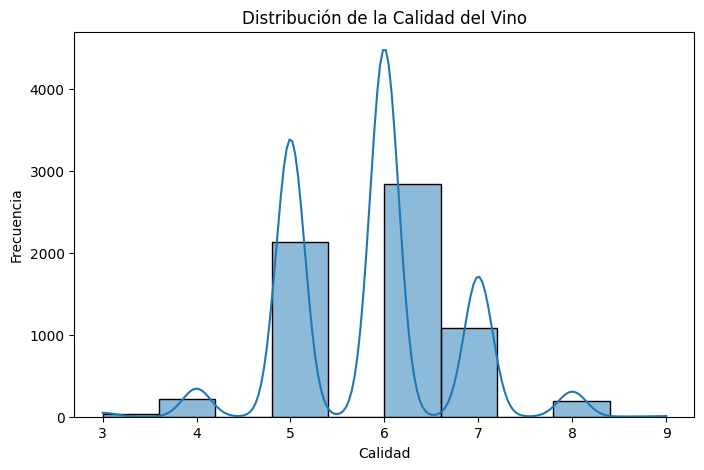

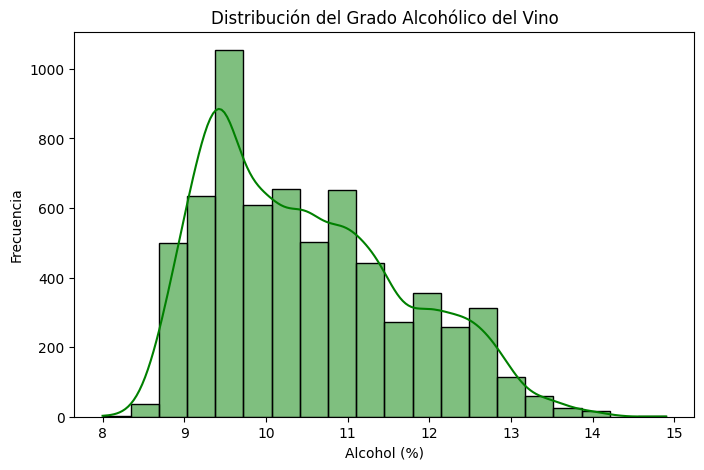

In [4]:
# Visualizar la distribución de la variable "quality" (Clasificación)
plt.figure(figsize=(8, 5))
sns.histplot(data[target_classification], bins=10, kde=True)
plt.title("Distribución de la Calidad del Vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

# Visualizar la distribución de la variable "alcohol" (Regresión)
plt.figure(figsize=(8, 5))
sns.histplot(data[target_regression], bins=20, kde=True, color='green')
plt.title("Distribución del Grado Alcohólico del Vino")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frecuencia")
plt.show()


In [5]:
print("\n🔍 Evaluación inicial:")

# Evaluación de calidad del vino
print("\n📌 Valores únicos de calidad del vino:")
print(data[target_classification].value_counts().sort_index())

# Evaluación del alcohol
print("\n📊 Estadísticas descriptivas del alcohol:")
print(data[target_regression].describe())



🔍 Evaluación inicial:

📌 Valores únicos de calidad del vino:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

📊 Estadísticas descriptivas del alcohol:
count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


In [9]:
# Ruta del archivo CSV
dataset_path = r"C:\Users\hp\Desktop\Python Scripts\wines_dataset.csv"

# Cargar el dataset con el delimitador correcto
data = pd.read_csv(dataset_path, delimiter="|", encoding="utf-8")

# Definir las variables X (features) y y (target)
X = data.drop(columns=["quality", "class"])  # Eliminamos la columna objetivo y la de tipo de vino
y = data["quality"]  # Clasificación: Predecir la calidad del vino

# División en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado de las variables numéricas (requerido para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos cargados y preparados correctamente.")


✅ Datos cargados y preparados correctamente.


In [10]:
# Entrenar KNN con k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_scaled, y_train)
y_pred_knn3 = knn_3.predict(X_test_scaled)

# Entrenar KNN con k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train_scaled, y_train)
y_pred_knn7 = knn_7.predict(X_test_scaled)

# Evaluación de KNN
print("\n📊 Evaluación de KNN (k=3):")
print(classification_report(y_test, y_pred_knn3))
print("\n📊 Evaluación de KNN (k=7):")
print(classification_report(y_test, y_pred_knn7))



📊 Evaluación de KNN (k=3):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.10      0.14      0.12        43
           5       0.57      0.63      0.60       428
           6       0.58      0.58      0.58       567
           7       0.47      0.37      0.41       216
           8       0.26      0.13      0.17        39
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.28      0.26      0.27      1300
weighted avg       0.53      0.53      0.53      1300


📊 Evaluación de KNN (k=7):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.20      0.02      0.04        43
           5       0.59      0.66      0.62       428
           6       0.57      0.63      0.60       567
           7       0.50      0.43      0.46       216
           8       0.1

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [12]:
# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación de Random Forest
print("\n📊 Evaluación de Random Forest:")
print(classification_report(y_test, y_pred_rf))



📊 Evaluación de Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.68      0.67      0.68       428
           6       0.60      0.77      0.67       567
           7       0.64      0.43      0.52       216
           8       1.00      0.13      0.23        39
           9       0.00      0.00      0.00         1

    accuracy                           0.63      1300
   macro avg       0.42      0.29      0.30      1300
weighted avg       0.62      0.63      0.61      1300



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [13]:
# Entrenar Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Evaluación de Gradient Boosting
print("\n📊 Evaluación de Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))



📊 Evaluación de Gradient Boosting:
              precision    recall  f1-score   support

           3       0.20      0.17      0.18         6
           4       0.47      0.19      0.27        43
           5       0.70      0.66      0.68       428
           6       0.62      0.76      0.69       567
           7       0.66      0.48      0.55       216
           8       0.63      0.31      0.41        39
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1300
   macro avg       0.47      0.37      0.40      1300
weighted avg       0.65      0.65      0.64      1300



In [14]:
models = {
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="balanced_accuracy")
    print(f"\n📌 {name}:")
    print(f"Balanced Accuracy Media: {scores.mean():.4f}")


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



📌 KNN (k=3):
Balanced Accuracy Media: 0.2981


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



📌 KNN (k=7):
Balanced Accuracy Media: 0.2740


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



📌 Random Forest:
Balanced Accuracy Media: 0.2952


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")



📌 Gradient Boosting:
Balanced Accuracy Media: 0.3608


In [15]:
# Definir los parámetros a optimizar
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Aplicar GridSearch
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="balanced_accuracy")
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("\n🔍 Mejores Hiperparámetros de Random Forest:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en test
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\n📊 Evaluación del Mejor Random Forest:")
print(classification_report(y_test, y_pred_best_rf))


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



🔍 Mejores Hiperparámetros de Random Forest:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

📊 Evaluación del Mejor Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.80      0.09      0.17        43
           5       0.72      0.74      0.73       428
           6       0.65      0.77      0.71       567
           7       0.69      0.53      0.60       216
           8       0.87      0.33      0.48        39
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.53      0.35      0.38      1300
weighted avg       0.69      0.68      0.67      1300



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

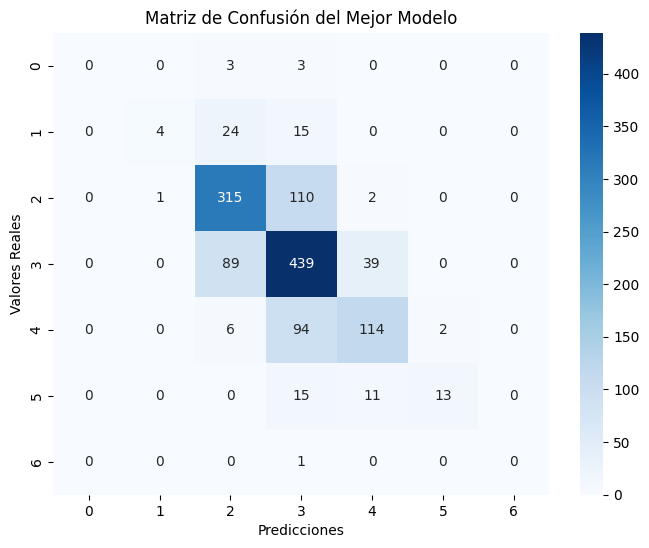

In [16]:
# Matriz de confusión del mejor modelo
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión del Mejor Modelo")
plt.show()


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [20]:
# Ruta del archivo CSV
dataset_path = r"C:\Users\hp\Desktop\Python Scripts\wines_dataset.csv"

# Cargar el dataset
data = pd.read_csv(dataset_path, delimiter="|", encoding="utf-8")

# Definir variables X (features) y y (target para regresión)
X = data.drop(columns=["alcohol"])  # Variables predictoras
y = data["alcohol"]  # Variable objetivo (grado alcohólico)

# Identificar variables categóricas
categorical_features = ["class"]
numeric_features = [col for col in X.columns if col not in categorical_features]

# Preprocesamiento: OneHotEncoding para 'class' y escalado para las numéricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

# Dividir en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Datos cargados y preparados correctamente.")


✅ Datos cargados y preparados correctamente.


In [21]:
# Pipeline con preprocesamiento y modelo
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Entrenar modelo
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluación del modelo
print("\n📊 Evaluación de Regresión Lineal:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")



📊 Evaluación de Regresión Lineal:
MAE: 0.3553
RMSE: 0.4723
R² Score: 0.8417


In [22]:
# Pipeline con preprocesamiento y modelo
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

# Entrenar modelo
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo
print("\n📊 Evaluación de Random Forest Regressor:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")



📊 Evaluación de Random Forest Regressor:
MAE: 0.3132
RMSE: 0.4373
R² Score: 0.8643


In [23]:
# Pipeline con preprocesamiento y modelo
gb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

# Entrenar modelo
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluación del modelo
print("\n📊 Evaluación de Gradient Boosting Regressor:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_gb):.4f}")



📊 Evaluación de Gradient Boosting Regressor:
MAE: 0.2903
RMSE: 0.4013
R² Score: 0.8858


In [24]:
models = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
    print(f"\n📌 {name}:")
    print(f"MAE Promedio: {-scores.mean():.4f}")



📌 Regresión Lineal:
MAE Promedio: 0.3520

📌 Random Forest:
MAE Promedio: 0.3233

📌 Gradient Boosting:
MAE Promedio: 0.2963


In [25]:
# Definir los parámetros a optimizar
param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [5, 10, 20],
    "regressor__min_samples_split": [2, 5, 10]
}

# Aplicar GridSearch
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring="neg_mean_absolute_error")
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("\n🔍 Mejores Hiperparámetros de Random Forest:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en test
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\n📊 Evaluación del Mejor Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best_rf)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_best_rf):.4f}")



🔍 Mejores Hiperparámetros de Random Forest:
{'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}

📊 Evaluación del Mejor Random Forest:
MAE: 0.2634
RMSE: 0.4010
R² Score: 0.8859


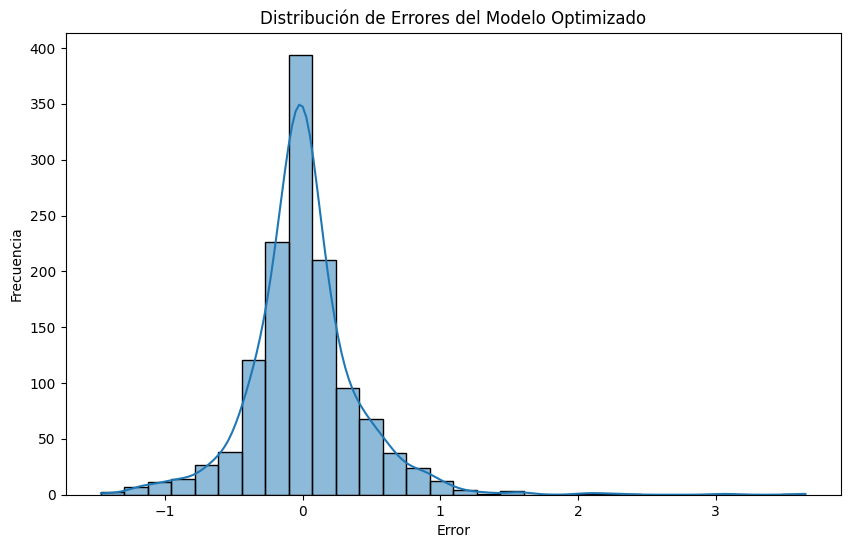

In [26]:
# Distribución de los errores
errors = y_test - y_pred_best_rf
plt.figure(figsize=(10,6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores del Modelo Optimizado")
plt.show()
